# Keras Tutorial: The Simplest Possible Autoencoder

This tutorial is based on [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html).

The code below produces a very simple autoencoder. See the tutorial linked above to extend this code into more advanced forms of autoencoders.

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

Let's also create a separate encoder model:

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

As well as the decoder model:

In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

15302656/15296311 [==============================] - 2s     


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


Now let's train our autoencoder for 50 epochs:

In [11]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s - loss: 0.3713 - val_loss: 0.2722
Epoch 2/50
60000/60000 [==============================] - 10s - loss: 0.2648 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 11s - loss: 0.2452 - val_loss: 0.2341
Epoch 4/50
60000/60000 [==============================] - 10s - loss: 0.2263 - val_loss: 0.2161
Epoch 5/50
60000/60000 [==============================] - 11s - loss: 0.2105 - val_loss: 0.2024
Epoch 6/50
60000/60000 [==============================] - 11s - loss: 0.1987 - val_loss: 0.1922
Epoch 7/50
60000/60000 [==============================] - 11s - loss: 0.1895 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 11s - loss: 0.1818 - val_loss: 0.1768
Epoch 9/50
60000/60000 [==============================] - 9s - loss: 0.1753 - val_loss: 0.1708
Epoch 10/50
60000/60000 [==============================] - 10s - loss: 0.1697 - val_los

After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

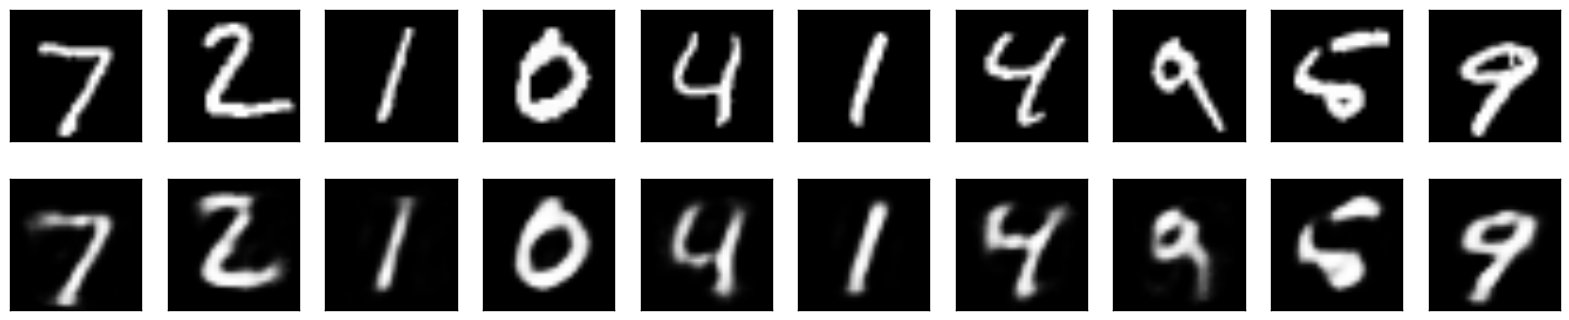

In [13]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()